<Axes: ylabel='hwy'>

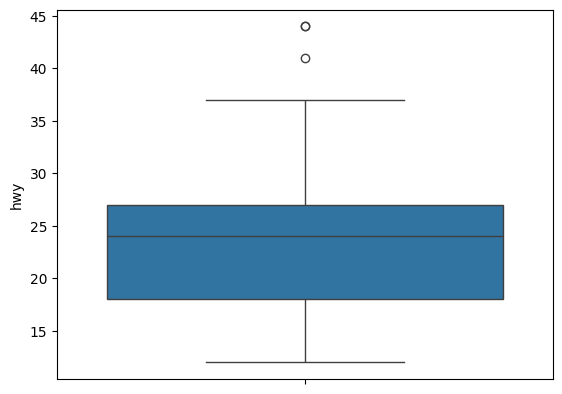

In [1]:
import pandas as pd

mpg = pd.read_csv('mpg.csv')

import seaborn as sns # 그래프 등 시각적인 패키지
# data는 mpg를 사용하고 y축에 hwy를 넣는다는 뜻
sns.boxplot(data=mpg, y = 'hwy')

In [2]:
pct25 = mpg['hwy'].quantile(.25)
pct25 # 18.0

pct75 = mpg['hwy'].quantile(.75)
pct75 # 27.0

# 앞에서 구한 pct 25, pct 75를 이용해 1사분위수와 3사분위수의 거리를 나타낸
# IQR(inter quartilte range, 사분위 범위)를 구하자.
iqr = pct75 - pct25
iqr # 9.0

np.float64(9.0)

In [3]:
pct25 - 1.5 * iqr # 하한 4.5
pct75 + 1.5 * iqr # 상한 40.5

np.float64(40.5)

In [4]:
import numpy as np

# 4.5 - 40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),
                      np.nan, mpg['hwy'])

# 결측치 빈도 확인 -> 3
mpg['hwy'].isna().sum()

np.int64(3)

In [5]:
# 순서 
# hwy 결측치 제거 -> drv별 분리 -> hwy 평균 구하기
mpg.dropna(subset = 'hwy')\
.groupby('drv')\
.agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000
